In [1]:
"""
@ Author:         姜楠
@ Create Date:    2021-11-10
"""
import pandas as pd
import numpy as np

car = pd.read_csv("CarPrice_Assignment.csv")
car

,weight,height,price
0,10,10,10
1,15,18,20
2,27,33,30
3,29,39,40
4,53,63,50


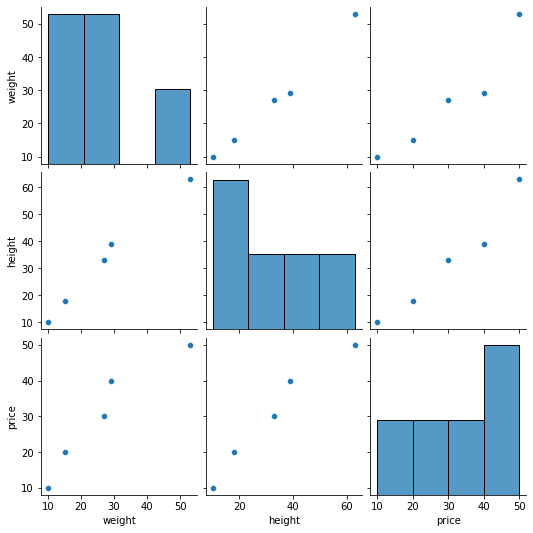

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

#测试线性关系展示
# plt.title("car price predictor")
# plt.xlabel("wheelbase")
# plt.ylabel("price")
# plt.scatter(car["wheelbase"],car["price"])
# 通过全局的线性图筛选相关度高的字段
import seaborn as sns
sns.pairplot(car)
plt.show()


In [3]:
# 拆分 X\Y ，去除相关度少的字段信息
# x=car.drop(["price","car_ID","symboling","carheight","stroke","peakrpm","compressionratio"],axis="columns")
x=car.drop(["price"],axis="columns")
y=car["price"]


In [23]:
#整理测试集、训练集
# limit=10
limit=1
row = np.size(x,0)-1
col = np.size(x,1)
x_train=x[:row]
y_train=y[:row]
x_test=x[row:]
y_test=y[row:]
# 设置训练集行数
train_row=np.size(x_train,0)
print(x_train.to_numpy())
print(x_test.to_numpy())
print(y_test.to_numpy())

# train_row
# x_train.as_matrix

# x_test
# col
# y_train

[[10 10]
 [15 18]
 [27 33]
 [29 39]]
[[53 63]]
[50]


In [28]:
#均方误差代价函数
def costFun(X,Y,W):
    m=train_row
    return (np.sum(np.dot(X,W.T)-Y)**2)/(2*m)

# 使用to_numpy()会去掉索引，不加括号就会带索引
X=np.mat(x_train.to_numpy())
# X
Y=np.mat(y_train.to_numpy()).T
W=np.mat(np.zeros(col))
B=np.mat(np.zeros(col))
# W
# W
# row
# W
# W.shape
# W.shape
# W = np.zeros((col,1));
# W=y_train;
# Q=costFun(X,Y,W)
# Q

In [29]:
# 梯度下降

def gradientDescent(X,Y,W,B,num):
#     使用行数
    m=row
    alpha=0.00001
    temp = np.mat(np.zeros(W.shape))
    cost = np.zeros(num)
    wNums = int(W.shape[1])
    print(wNums)
    for i in range(num):
        cost[i] = costFun(X,Y,W)
        temp = W-alpha*2*(np.dot(X.T,(np.dot(X,W.T)-Y)))
        W = temp
    return W,cost

# 迭代次数
iters=200

# 返回来一个给定形状和类型的用0填充的数组
# gradientDescent(X,Y,W,iters)
finalW,cost = gradientDescent(X,Y,W,B,iters)
finalW,cost
# Y_TEST = dot(X,W)
# x=np.arange(len(Y))+1

# plt.scatter(x,list(Y),s=10)
# plt.plot(x,Y,'b')
# plt.plot(x,Y_TEST,'r')
    

2


(matrix([[ 1.86996844, -0.6786611 ],
         [ 2.43722545, -0.78085945]]),
 array([1.25000000e+03, 4.07363237e+03, 3.31966171e+03, 2.70592180e+03,
        2.20625713e+03, 1.79939870e+03, 1.46805025e+03, 1.19814541e+03,
        9.78243866e+02, 7.99040507e+02, 6.52966322e+02, 5.33864022e+02,
        4.36724281e+02, 3.57471327e+02, 2.92788607e+02, 2.39977052e+02,
        1.96839838e+02, 1.61588676e+02, 1.32767619e+02, 1.09191104e+02,
        8.98935631e+01, 7.40884437e+01, 6.11348832e+01, 5.05105988e+01,
        4.17898377e+01, 3.46254384e+01, 2.87342367e+01, 2.38851918e+01,
        1.98897230e+01, 1.65938463e+01, 1.38717734e+01, 1.16207016e+01,
        9.75657130e+00, 8.21061130e+00, 6.92652546e+00, 5.85820039e+00,
        4.96783791e+00, 4.22443290e+00, 3.60253235e+00, 3.08122355e+00,
        2.64330856e+00, 2.27463076e+00, 1.96352495e+00, 1.70036838e+00,
        1.47721393e+00, 1.28749026e+00, 1.12575658e+00, 9.87502033e-01,
        8.68981379e-01, 7.67080419e-01, 6.79205634e-01, 6.03

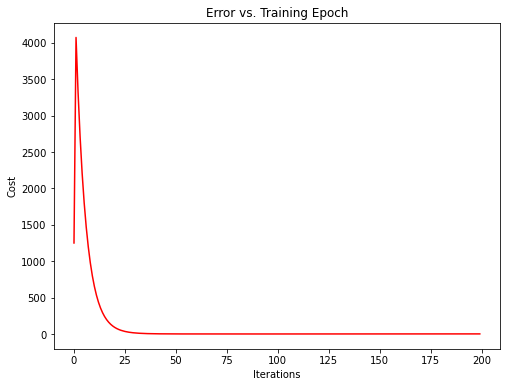

In [17]:
fig, bx = plt.subplots(figsize=(8,6))
bx.plot(np.arange(iters), cost, 'r') 
bx.set_xlabel('Iterations') 
bx.set_ylabel('Cost') 
bx.set_title('Error vs. Training Epoch') 
plt.show()

In [24]:
# 预测
X_TEST=np.mat(x_test.to_numpy())
# X
Y_TEST=np.mat(y_test.to_numpy()).T
Y_PRIDICT=np.dot(X_TEST,finalW.T)
print(X_TEST)
print(Y_PRIDICT)
print(Y_TEST)

[[53 63]]
[[56.3526782  79.97880392]]
[[50]]


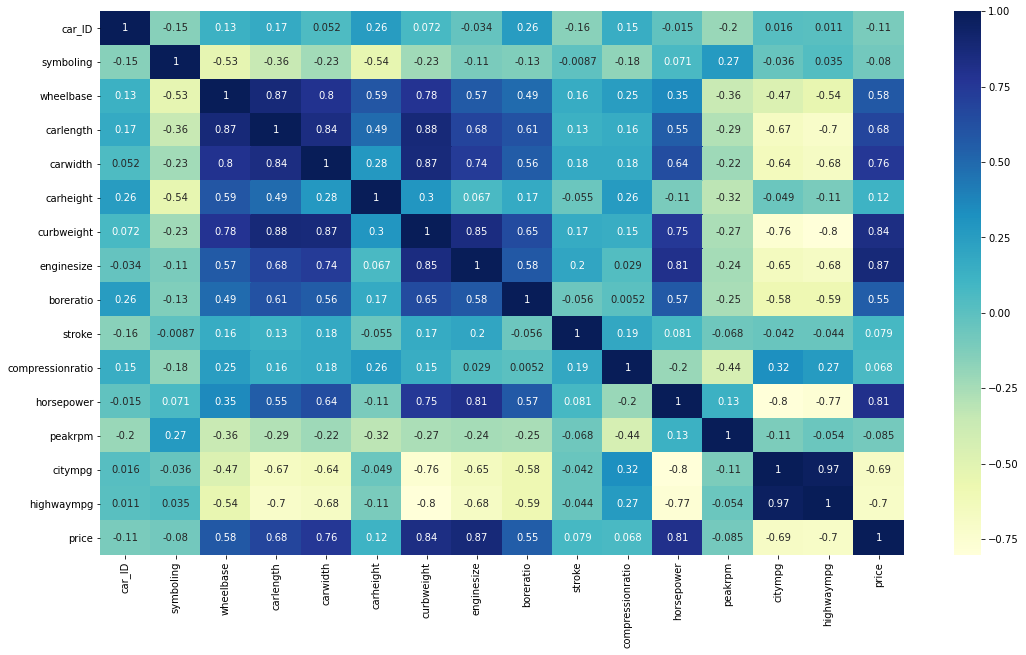

In [48]:
plt.figure(figsize=(18,10))
sns.heatmap(car.corr(),cmap='YlGnBu', annot=True)
plt.show();

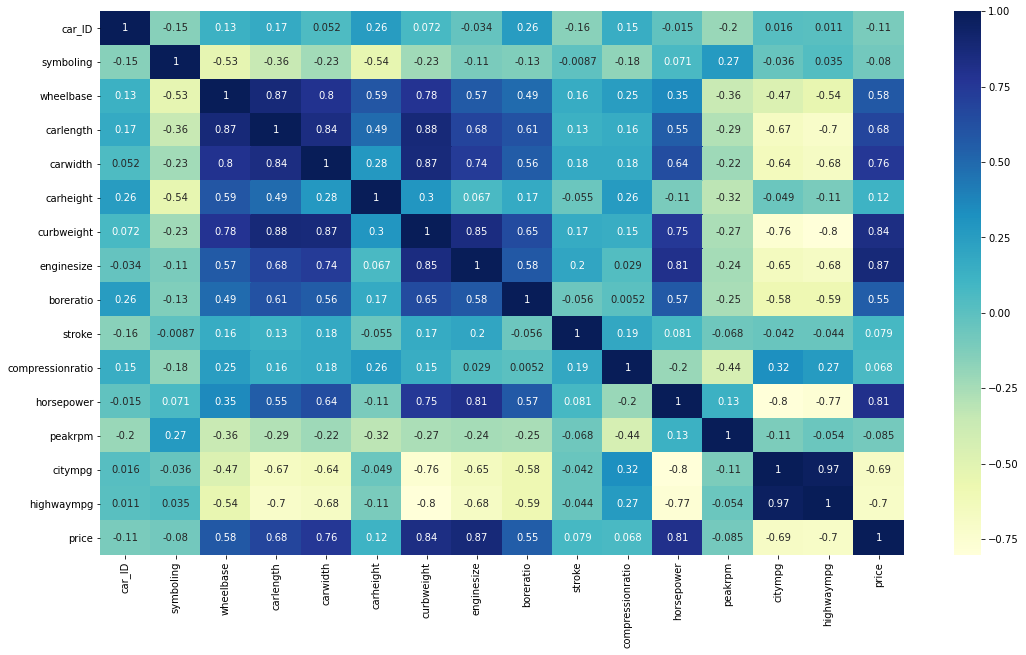

In [17]:
plt.figure(figsize=(18,10))
sns.heatmap(car.corr(),cmap='YlGnBu', annot=True)
plt.show();

In [10]:


from sklearn.linear_model import LinearRegression
jn_clf=LinearRegression(fit_intercept=False)
jn_clf.fit(x_train,y_train)

LinearRegression(fit_intercept=False)

In [11]:
jn_clf.predict(x_test)

array([ 4443.39038345,  3596.25203563,  9691.14805881, 13326.18445982,
       11157.67509289,  9491.65714211, 23373.20017423, 21478.40233896,
       10272.30057817,  7346.72742143,  8783.36337515,  3835.13166653,
       26576.24859089, 17702.79679506,  8389.33549925,  8216.77632148,
       10063.99354757, 43510.69659289,  5738.29094943,  9244.81502116,
       23998.28825495, 12496.71464743,  5150.89999455, 26118.91982151,
       23481.98790666, 10869.97851837,  5506.84857535,  3053.40007417,
       12697.89161412,  6624.43750863, 11023.33144565,  8414.36377325,
       15164.73578303, 16725.97243262, -5097.355026  ,  8802.04894847,
       10527.33391669,  3003.85265056, 13790.5780867 ,  2977.31719486,
        6936.21617229,  9274.50794696,  5838.80274837, 12272.52679874,
       10575.54982351,  6989.30328289, 12328.20273958, 10573.95239718,
       17009.96545959, 21748.77619548, 14557.73188802, 10736.1415814 ,
        8100.7038208 ,  6667.60134468, 13877.2379336 , 16074.14027871,
      

In [12]:
jn_clf.score(x_test,y_test)

0.7076123469144093